# Miami grand prix speed map

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [3]:
year = 2025
wknd = 6
ses = 'SQ'
driver = 'ANT'
colormap = mpl.cm.plasma

session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

core           INFO 	Loading data for Miami Grand Prix - Sprint Qualifying [v3.5.3]


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['12', '81', '4', '1', '63', '16', '44', '23', '6', '14', '27', '31', '10', '30', '55', '18', '7', '22', '5', '87']


In [5]:
lap

Time                      0 days 00:58:36.647000
Driver                                       ANT
DriverNumber                                  12
LapTime                   0 days 00:01:26.482000
LapNumber                                   14.0
Stint                                        4.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.668000
Sector2Time               0 days 00:00:32.978000
Sector3Time               0 days 00:00:24.836000
Sector1SessionTime        0 days 00:57:38.833000
Sector2SessionTime        0 days 00:58:11.811000
Sector3SessionTime        0 days 00:58:36.647000
SpeedI1                                    224.0
SpeedI2                                    193.0
SpeedFL                                    286.0
SpeedST                                    341.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [6]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-05-02 21:13:32.066,0 days 00:57:10.165000,,405.138889,0 days 00:00:00,10530.364261,294.914284,8,100.0,False,12,interpolation,0.121037,0.000023,OnTrack,1834.754727,129.140042,249.422210
3,2025-05-02 21:13:32.191,0 days 00:57:10.290000,,405.138889,0 days 00:00:00.125000,10554.025012,296.700001,8,100.0,False,12,pos,10.453662,0.001951,OnTrack,1949.000000,57.000000,250.000000
4,2025-05-02 21:13:32.212,0 days 00:57:10.311000,,405.138889,0 days 00:00:00.146000,10558.000000,297.000000,8,100.0,False,12,car,12.193889,0.002276,OnTrack,1973.125906,41.914594,250.114624
5,2025-05-02 21:13:32.372,0 days 00:57:10.471000,,405.138889,0 days 00:00:00.306000,10638.571429,298.714286,8,100.0,False,12,pos,25.494186,0.004758,OnTrack,2174.000000,-83.000000,251.000000
6,2025-05-02 21:13:32.492,0 days 00:57:10.591000,1,405.138889,0 days 00:00:00.426000,10699.000000,300.000000,8,100.0,False,12,car,35.527222,0.006631,OnTrack,2270.451695,-143.075656,251.292780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2025-05-02 21:14:58.052,0 days 00:58:36.151000,1,400.740833,0 days 00:01:25.986000,11760.000000,285.000000,7,100.0,False,12,pos,5302.644444,0.989740,OnTrack,1521.000000,315.000000,249.000000
634,2025-05-02 21:14:58.212,0 days 00:58:36.311000,1,392.429722,0 days 00:01:26.146000,11813.000000,288.000000,7,100.0,False,12,car,5315.444444,0.992130,OnTrack,1659.720384,237.020823,249.136813
635,2025-05-02 21:14:58.352,0 days 00:58:36.451000,1,384.846389,0 days 00:01:26.286000,11885.500000,289.500000,7,100.0,False,12,pos,5326.732263,0.994236,OnTrack,1781.000000,165.000000,249.000000
636,2025-05-02 21:14:58.492,0 days 00:58:36.591000,1,377.263056,0 days 00:01:26.426000,11958.000000,291.000000,7,100.0,False,12,car,5338.077778,0.996354,OnTrack,1880.618932,103.986341,249.135236


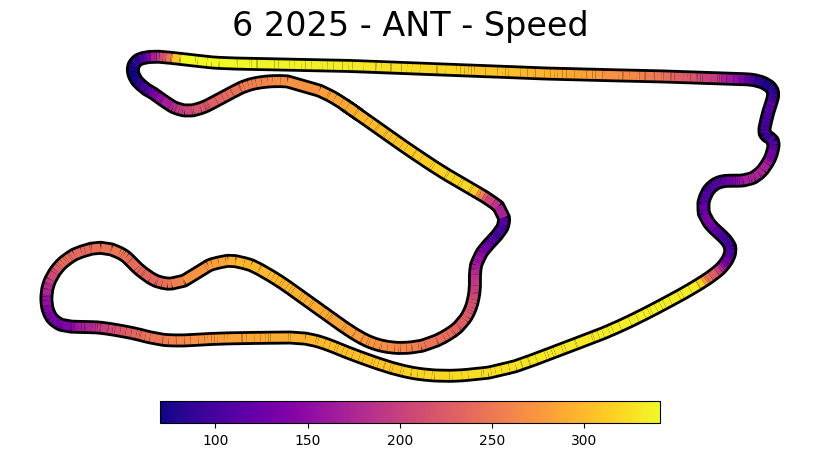

In [11]:
# We create a plot with title and adjust some setting to make it look good.
# fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(10,4.5))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=10, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=6)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()


---

This is the end of the notebook.